# BCR4BP propagation test

Yuri Shimane, 2021/05/30

In [1]:
using LinearAlgebra
using DifferentialEquations
using Plots
using LSODA

LoadError: ArgumentError: Package LSODA not found in current path:
- Run `import Pkg; Pkg.add("LSODA")` to install the LSODA package.


In [2]:
gr()

Plots.GRBackend()

In [3]:
include("../R3BP/src/R3BP.jl")

Main.R3BP

In [4]:
"""
    list_to_plotarray(sollist, state_idx_x, state_idx_y)

Function for plotting from list of states in 2D
"""
function list_to_plotarray(sollist, state_idx_x, state_idx_y)
    x_plot, y_plot = [], []
    for k = 1:length(sollist)
        push!(x_plot, sollist[k][state_idx_x])
        push!(y_plot, sollist[k][state_idx_y])
    end
    return x_plot, y_plot
end



list_to_plotarray

In [5]:
params = R3BP.get_cr3bp_param(399, 301)
mu = params.mu

0.012150584269940354

In [6]:
paramsBCR4BP = R3BP.get_bcr4bp_param("399", "301")

a_m1_sun: 1.496e8, gm_sun: 1.3271244004193938e11
ω_s: -0.9253018261815922


Main.R3BP.BCR4BP_param(0.012150584269940354, 384400.0, 375190.2619517228, 403503.2355022598, 66182.92311059945, 328900.5598102475, 389.1779396462019, -0.9253018261815922, 2.547698355919253e6)

In [7]:
paramsBCR4BP.a

389.1779396462019

In [8]:
# initial state
x0 = [0.9853006895390061, 0.0021723003109550003, 0.0034046027917,
      -1.198746524193054, 1.038423839870351, -1.559959799100589]
tof = -8618330.44810824/params.tstar   # [sec] -> [canonical]
t0 = 6.1766906409562035 * π/180  # should be β_s
println("tof: $tof")

tof: -22.970560065381424


In [9]:
# p[1] = μ, p[2] = μ_3, p[3] = t0, p[4] = a, p[5] = ω_s
tspan = (0.0, tof)
p = (paramsBCR4BP.mu, paramsBCR4BP.μ_3, t0, paramsBCR4BP.a, paramsBCR4BP.ω_s)

(0.012150584269940354, 328900.5598102475, 0.10780358856180466, 389.1779396462019, -0.9253018261815922)

In [10]:
# BCR4BP propagation
prob = ODEProblem(R3BP.rhs_bcr4bp_sv!, x0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-12, abstol=1e-12);

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\yshimane3\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


In [11]:
# sols = []
# t0_test = t0 .+ LinRange(-1.5, 1.5, 100)
# for t0_try in t0_test
#     p_test = (paramsBCR4BP.mu, paramsBCR4BP.μ_3, t0_try, paramsBCR4BP.a, paramsBCR4BP.ω_s)
#     prob2 = remake(prob, p=p_test)
#     sol_iter = solve(prob2, Tsit5(), reltol=1e-12, abstol=1e-12);
#     push!(sols, sol_iter)
# end

In [12]:
# ptraj1 = plot(aspect_ratio=:equal, flip=false)
# for sol_iter in sols
#     plot!(ptraj1, sol_iter, vars=(1,2), flip=false)
# end
# ptraj1

In [13]:
# CR3BP propagation
prob_3bp = ODEProblem(R3BP.rhs_cr3bp_sv!, x0, tspan, (paramsBCR4BP.mu))
sol_3bp = solve(prob_3bp, Tsit5(), reltol=1e-12, abstol=1e-12);

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\yshimane3\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


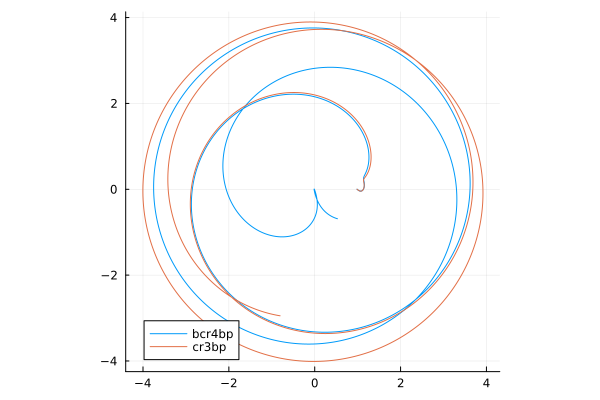

In [14]:
ptraj = plot(aspect_ratio=:equal, flip=false)
plot!(ptraj, sol, vars=(1,2), flip=false, label="bcr4bp")
plot!(ptraj, sol_3bp, vars=(1,2), flip=false, label="cr3bp")
ptraj

```
    "187":{
        "mu":0.012150585609624,
        "family_LPO":"L2_Halo_Southern",
        "Jacobi_LPO":3.103565886650939,
        "Period_LPO":3.30357641283143,
        "periluneAlt":99.997371771836242,
        "raan_loi":146.878717569880194,
        "incl_loi":39.725642433027119,
        "loi_cost":0.643866129730901,
        "beta_loi":40.0,
        "perigee":2752.436849085228459,
        "beta_perigee":26.419002136893269,
        "tof":-26.905552902086694,
        "periluneEM_baryrot_x":0.983542426547915,
        "periluneEM_baryrot_y":-0.000146822341819,
        "periluneEM_baryrot_z":0.002057787035583,
        "periluneEM_baryrot_vx":0.565349477000122,
        "periluneEM_baryrot_vy":-1.872868422392179,
        "periluneEM_baryrot_vz":1.049658861260682,
        "perigeeEM_baryrot_x":0.000933711482026,
        "perigeeEM_baryrot_y":-0.018733931900401,
        "perigeeEM_baryrot_z":-0.006402981173068,
        "perigeeEM_baryrot_vx":-0.948514008357327,
        "perigeeEM_baryrot_vy":-8.841450815035341,
        "perigeeEM_baryrot_vz":-1.946806641516492
    },
```

In [15]:
#include("../R3BP/src/R3BP.jl")

In [16]:
paramsBCR4BP.ω_s, paramsBCR4BP.tsyn

(-0.9253018261815922, 2.547698355919253e6)

In [17]:
# state at perigee
x0_prg = [0.000933711482026, -0.018733931900401, -0.006402981173068,
         -0.948514008357327, -8.841450815035341, -1.946806641516492]
tof_prg = 26.905552902086694
t0_prg = 26.419002136893269 * π/180
p_prg = (paramsBCR4BP.mu, paramsBCR4BP.μ_3, t0_prg, paramsBCR4BP.a, paramsBCR4BP.ω_s)
println("tof: $tof_prg")

prob_prg = ODEProblem(R3BP.rhs_bcr4bp_sv!, x0_prg, (0, tof_prg), p_prg,
    method=Tsit5(), reltol=1e-12, abstol=1e-12
)
sol_prg = solve(prob);

tof: 26.905552902086693


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\yshimane3\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


In [18]:
# state at LOI
x0_loi = [0.983542426547915, -0.000146822341819, 0.002057787035583,
          0.565349477000122, -1.872868422392179, 1.049658861260682]
tof_loi = -26.905552902086694
t0_loi = 40.0 * π/180
p_loi = (paramsBCR4BP.mu, paramsBCR4BP.μ_3, t0_loi, paramsBCR4BP.a, paramsBCR4BP.ω_s)
println("tof: $tof_loi")

# BCR4BP propagation
prob_loi = ODEProblem(R3BP.rhs_bcr4bp_sv!, x0_loi, (0, tof_loi), p_loi)
sol_loi = solve(prob, Tsit5(), reltol=1e-12, abstol=1e-12);

tof: -26.905552902086693


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\yshimane3\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


In [19]:
gr()

Plots.GRBackend()

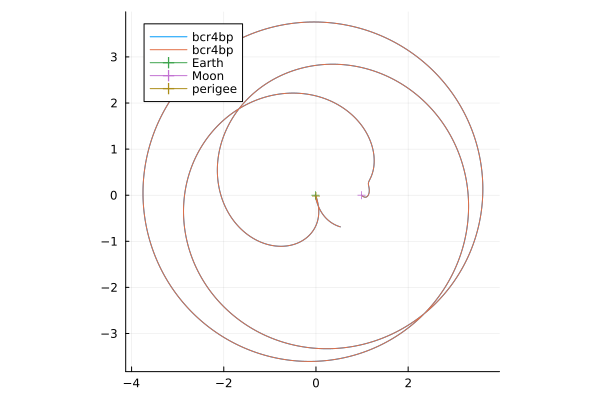

In [20]:
plet = plot(aspect_ratio=:equal, flip=false, figsize=(20,20))
plot!(plet, sol_loi, vars=(1,2), flip=false, label="bcr4bp")
plot!(plet, sol_prg, vars=(1,2), flip=false, label="bcr4bp")
plot!(plet, [-paramsBCR4BP.mu], [0.0], marker=:cross, label="Earth")
plot!(plet, [1.0-paramsBCR4BP.mu], [0.0], marker=:cross, label="Moon")
plot!(plet, [x0_prg[1]], [x0_prg[2]], marker=:cross, label="perigee")
plet